## Import library

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Membaca gambar

In [2]:
img = cv2.imread('diva.jpg')

## Menampilkan gambar (BGR)

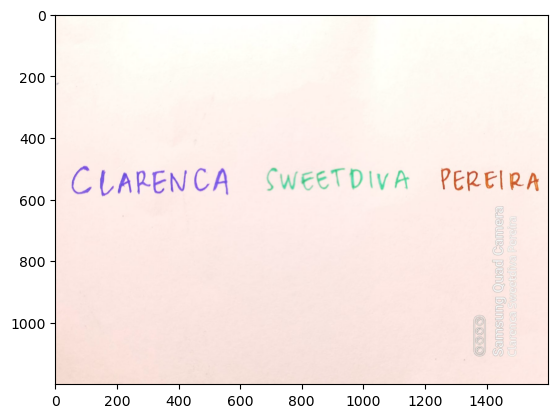

In [3]:
plt.imshow(img)

## Konversi citra BGR ke RGB

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Menampilkan gambar (RGB)

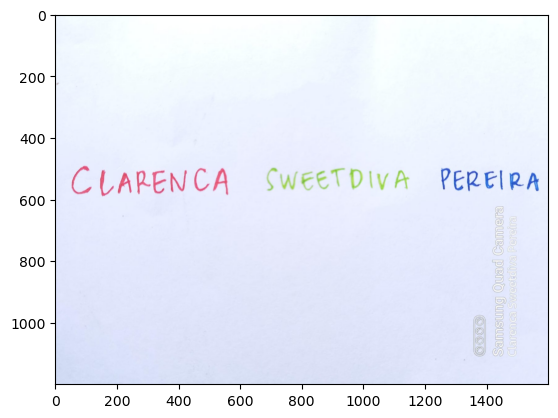

In [5]:
plt.imshow(img)

## Membuat baris dan kolom

In [6]:
[baris,kolom] = img.shape[:2]

## Memurnikan warna

In [7]:
for x in range(baris):
    for y in range(kolom):
        max1 = 0
        max2 = 0
        for z in range(3):
            if(max1 == 0):
                max1 = img[x, y, z]
                imax1 = z
            elif(max1 < img[x, y, z]):
                max2 = max1
                imax2 = imax1
                
                max1 = img[x, y, z]
                imax1 = z
            elif(max2 < img[x, y, z]):
                max2 = img[x, y, z]
                imax2 = z
        if((img[x, y, imax1] - img[x, y, imax2]) > 250):
            for z in range(3):
                if(z != imax1):
                    img[x, y, z] = 0

## Menampilkan gambar yang sudah dimurnikan warnanya

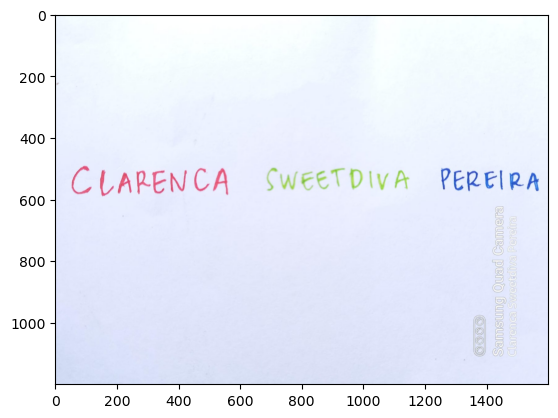

In [8]:
plt.imshow(img, cmap = 'gray')

# 1. Deteksi 3 warna pada citra

## Deteksi warna merah

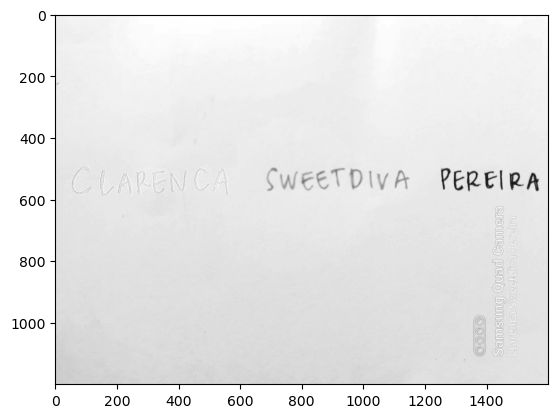

In [9]:
merah = img[:,:,0] #merah
plt.imshow(merah, cmap='gray')

## Deteksi warna hijau

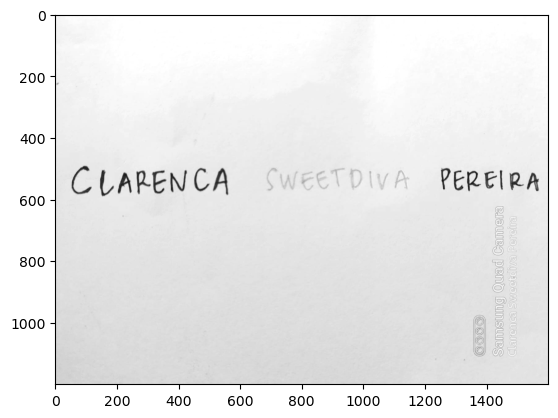

In [10]:
hijau = img[:,:,1] #hijau
plt.imshow(hijau, cmap='gray')

## Deteksi warna biru

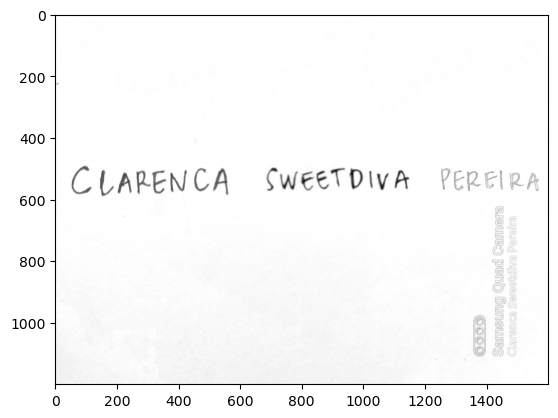

In [11]:
biru = img[:,:,2] #biru
plt.imshow(biru, cmap='gray')

## Histogram dari tiap warna pada citra

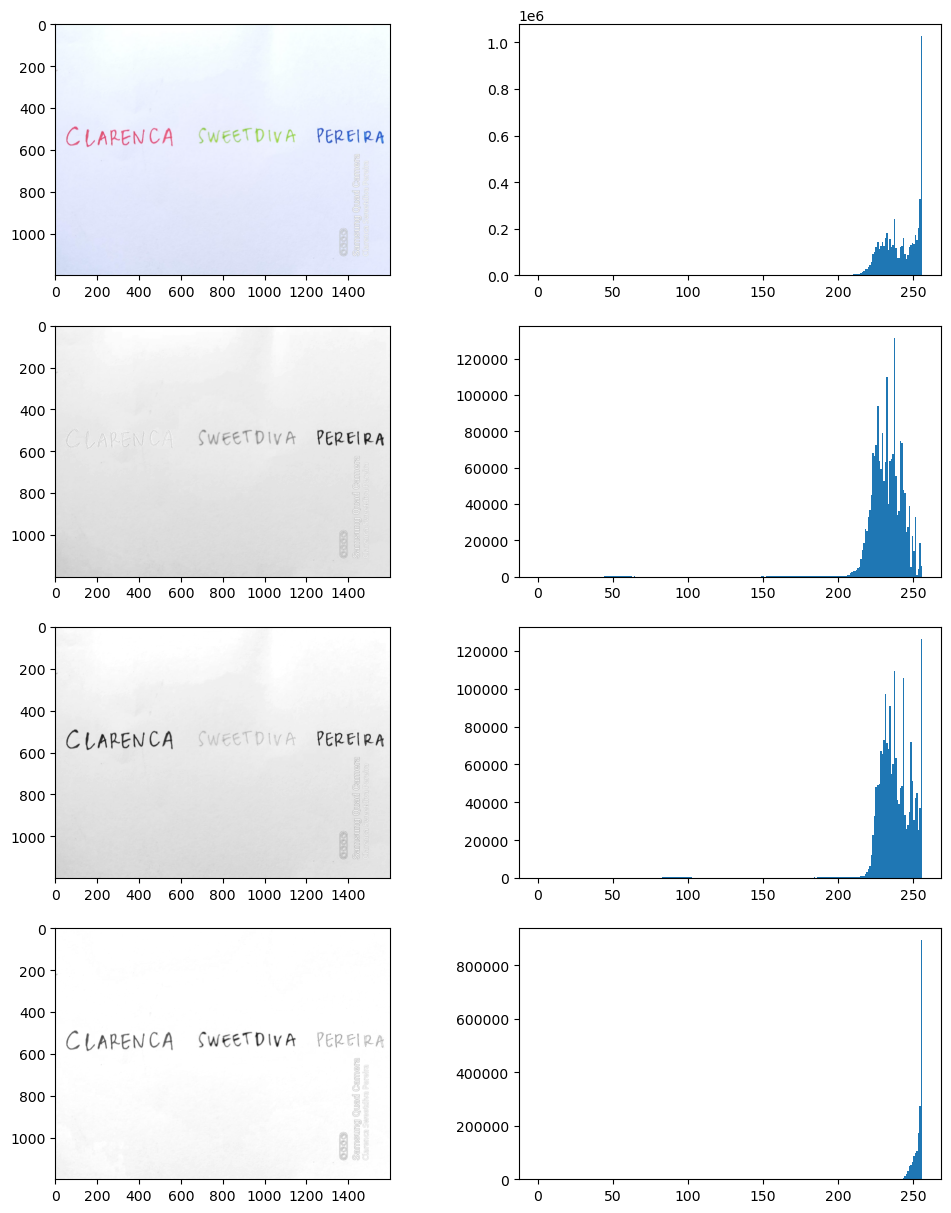

In [12]:
fig, axs = plt.subplots(4,2, figsize = (12,15))

axs[0,0].imshow(img, cmap = 'gray')
axs[0,1].hist(img.ravel(), 256, [0, 256])

axs[1,0].imshow(merah, cmap = 'gray')
axs[1,1].hist(merah.ravel(), 256, [0, 256])

axs[2,0].imshow(hijau, cmap = 'gray')
axs[2,1].hist(hijau.ravel(), 256, [0,256])

axs[3,0].imshow(biru, cmap = 'gray')
axs[3,1].hist(biru.ravel(), 256, [0,256])

plt.show()

# 2. Ambang batas untuk menampilkan kategori warna pada citra

Text(0.5, 1.0, 'Red-Green-Blue')

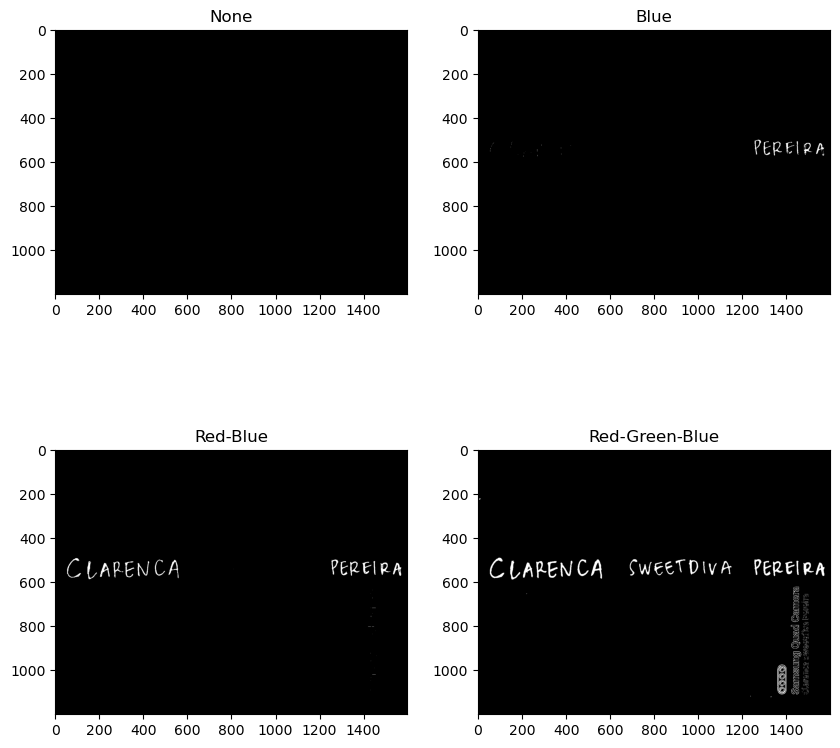

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots (2, 2, figsize=(10,10))

(thresh, binary1) = cv2.threshold(gray, 3, 255, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap = 'gray')
axs[0,0].set_title('None')

(thresh, binary2) = cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY)
axs[0,1].imshow(binary2, cmap = 'binary')
axs[0,1].set_title('Blue')

(thresh, binary3) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
axs[1,0].imshow(binary3, cmap = 'binary')
axs[1,0].set_title('Red-Blue')

(thresh, binary4) = cv2.threshold(gray, 210, 255, cv2.THRESH_BINARY)
axs[1,1].imshow(binary4, cmap = 'binary')
axs[1,1].set_title('Red-Green-Blue')